Sources:

https://github.com/Coding-Crashkurse/RAG-Evaluation-with-Ragas/blob/main/ragas.ipynb
https://www.youtube.com/watch?v=aeae-sITqEA

In [ ]:
!pip install langchain langchain-community

Youtube Link:
https://www.youtube.com/watch?v=aeae-sITqEA

In [ ]:
# SIMULATING THE APP HERE, ONLY FOR 1 DOCUMENT
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
data_path = "Aspect Detection and Sentiment Classification using Deep Neural Network for Indonesian Aspect-Based Sentiment Analysis.pdf"

print("Loading PDF...")
loader = PyPDFLoader(data_path)
pages = loader.load()

for page in pages:
  page.metadata['file_name'] = page.metadata['source']

print(f"PDF loaded: {data_path}...")

print("Splitting text...")
# Initialize the RecursiveCharacterTextSplitter for splitting text
# predefined length -- how many chars do we want per chunk
# overlap - character 0 - 1000, first document. Then, there's an overlap of +-150 characters between doc 1 and doc 2
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=1000, chunk_overlap=50)
chunked_documents = text_splitter.split_documents(pages)

print('Length of chunks:', len(chunked_documents))

In [5]:
# SIMULATING THE APP HERE, FOR MULTI DOCUMENT
from langchain_community.document_loaders import PyPDFDirectoryLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
data_path = "."

print("Loading directory...")
# pdf_loader = PyPDFDirectoryLoader(path=data_path, glob="**/*.pdf", recursive=True)
pdf_loader = PyPDFDirectoryLoader(path=data_path, glob="*.pdf", recursive=True)
documents = pdf_loader.load()

for document in documents:
  document.metadata['file_name'] = document.metadata['source']

print("Directory loaded...")
print("Documents length:", len(documents))

print("Splitting text...")
# Initialize the RecursiveCharacterTextSplitter for splitting text
# predefined length -- how many chars do we want per chunk
# overlap - character 0 - 1000, first document. Then, there's an overlap of +-150 characters between doc 1 and doc 2
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
chunked_documents = text_splitter.split_documents(documents)

# Remove the bibiography of each PDF ?? Maybe not needed
print('Length of chunks:', len(chunked_documents))

Loading directory...
Directory loaded...
Documents length: 29
Splitting text...
Length of chunks: 161


In [6]:
import os
from dotenv import load_dotenv
load_dotenv()
openai_api_key=os.environ["OPENAI_API_KEY"]
print("done")

done


In [7]:
# "gpt-4-1106-preview"
GPT_MODEL = "gpt-3.5-turbo-0125"
CRITIC_MODEL = "gpt-4-turbo"
EMBEDDING_MODEL = "text-embedding-ada-002"

In [8]:
chunked_documents

[Document(page_content='FRAGILE MODEL WATERMARK FOR INTEGRITY PROTECTION: LEVERAGING\nBOUNDARY VOLATILITY AND SENSITIVE SAMPLE-PAIRING\nZhenZhe Gao, Zhenjun Tang, Zhaoxia Yin*, Baoyuan Wu, Yue Lu\nABSTRACT\nNeural networks have increasingly influenced people’s lives.\nEnsuring the faithful deployment of neural networks as de-\nsigned by their model owners is crucial, as they may be sus-\nceptible to various malicious or unintentional modifications,\nsuch as backdooring and poisoning attacks. Fragile model\nwatermarks aim to prevent unexpected tampering that could\nlead DNN models to make incorrect decisions. They ensure\nthe detection of any tampering with the model as sensitively\nas possible. However, prior watermarking methods suffered\nfrom inefficient sample generation and insufficient sensitiv-\nity, limiting their practical applicability. Our approach em-\nploys a sample-pairing technique, placing the model bound-\naries between pairs of samples, while simultaneously maxi-', met

In [9]:

from ragas.testset.generator import TestsetGenerator
from ragas.testset.evolutions import simple, reasoning, multi_context

generator = TestsetGenerator.with_openai()

generator_llm = "gpt-3.5-turbo-0125" #being used in the app
# critic_llm = "gpt-4-turbo" #to be used by the evaluator
critic_llm = "gpt-3.5-turbo-0125" #to be used by the evaluator
embeddings = "text-embedding-ada-002" #being used in the app

generator = TestsetGenerator.with_openai(
    generator_llm,
    critic_llm,
    embeddings
)

# Test sets are 20% simple, 45% are reasoning, and 35% to be multi_context
distributions = {
    simple: 0.20,
    reasoning: 0.45,
    multi_context: 0.35
}

total_weight = sum(distributions.values())
if total_weight == 1:
    print("Distribution is valid.")
else:
    print(f"Total weight is {total_weight}, which does not equal 1. Please adjust your distribution.")

# generate testset
testset = generator.generate_with_langchain_docs(chunked_documents, test_size=15, distributions=distributions)

c:\Users\louis\Desktop\ay2023-2024-1st-sem-cmsc190-sp1-ridiculoys\code\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\louis\AppData\Local\Temp\ipykernel_9296\3838157382.py:4: DeprecationWarning: The function with_openai was deprecated in 0.1.4, and will be removed in the 0.2.0 release. Use from_langchain instead.
  generator = TestsetGenerator.with_openai()
C:\Users\louis\AppData\Local\Temp\ipykernel_9296\3838157382.py:11: DeprecationWarning: The function with_openai was deprecated in 0.1.4, and will be removed in the 0.2.0 release. Use from_langchain instead.
  generator = TestsetGenerator.with_openai(


Distribution is valid.


Filename and doc_id are the same for all nodes.                   
Generating:  33%|███▎      | 5/15 [04:20<09:24, 56.45s/it]

In [8]:
testset.to_pandas()

question  \
0  How does the move towards decentralization in ...   
1  How do adversarial questions impact the respon...   
2  How does decentralizing permissions enhance th...   
3  How does the trust anchor ensure application t...   
4  Which framework was used to create multilingua...   
5  How can blockchain wallet interfaces overcome ...   
6  How do researchers use adversarial prompts in ...   
7  What were the effects of adjusting temperature...   
8  How to defend against the 'Sandwich attack' ja...   
9  How does the SELF-DEFENSE framework help in cr...   

                                            contexts  \
0  [such as malware scans, it’s feasible to distr...   
1  [or against the model alignment policy. The ca...   
2  [Theexecute() function executes the functional...   
3  [such as malware scans, it’s feasible to distr...   
4  [of unsafe content. The authors tested the att...   
5  [Crossing this chasm faces several technical c...   
6  [type of jailbreak involves utilizing prompts ...   
7  [or against the model alignment policy. The ca...   
8  [mode. The additional reasons could be the lac...   
9  [of unsafe content. The authors tested the att...   

                                        ground_truth evolution_type  \
0  The move towards decentralization in emerging ...         simple   
1  Adversarial questions impact the responses gen...         simple   
2  Decentralizing permissions enhances the overal...         simple   
3  The trust anchor in Web3 typically involves th...      reasoning   
4                             SELF-DEFENSE framework      reasoning   
5  To address the technical challenges related to...      reasoning   
6  Researchers use adversarial prompts in differe...  multi_context   
7  The effects of adjusting temperature and rando...  multi_context   
8                                                nan  multi_context   
9  The SELF-DEFENSE framework helps in creating m...  multi_context   

                                            metadata  episode_done  
0  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
1  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
2  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
3  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
4  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
5  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
6  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
7  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
8  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
9  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True

In [9]:
testset.to_pandas().to_csv('testset.csv', index=False)

In [10]:
import pandas as pd

testset = pd.read_csv("testset.csv")

In [11]:
testset

question  \
0  How does the move towards decentralization in ...   
1  How do adversarial questions impact the respon...   
2  How does decentralizing permissions enhance th...   
3  How does the trust anchor ensure application t...   
4  Which framework was used to create multilingua...   
5  How can blockchain wallet interfaces overcome ...   
6  How do researchers use adversarial prompts in ...   
7  What were the effects of adjusting temperature...   
8  How to defend against the 'Sandwich attack' ja...   
9  How does the SELF-DEFENSE framework help in cr...   

                                            contexts  \
0  ['such as malware scans, it’s feasible to dist...   
1  ['or against the model alignment policy. The c...   
2  ['Theexecute() function executes the functiona...   
3  ['such as malware scans, it’s feasible to dist...   
4  ['of unsafe content. The authors tested the at...   
5  ['Crossing this chasm faces several technical ...   
6  ['type of jailbreak involves utilizing prompts...   
7  ['or against the model alignment policy. The c...   
8  ['mode. The additional reasons could be the la...   
9  ['of unsafe content. The authors tested the at...   

                                        ground_truth evolution_type  \
0  The move towards decentralization in emerging ...         simple   
1  Adversarial questions impact the responses gen...         simple   
2  Decentralizing permissions enhances the overal...         simple   
3  The trust anchor in Web3 typically involves th...      reasoning   
4                             SELF-DEFENSE framework      reasoning   
5  To address the technical challenges related to...      reasoning   
6  Researchers use adversarial prompts in differe...  multi_context   
7  The effects of adjusting temperature and rando...  multi_context   
8                                                NaN  multi_context   
9  The SELF-DEFENSE framework helps in creating m...  multi_context   

                                            metadata  episode_done  
0  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
1  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
2  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
3  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
4  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
5  [{'source': 'VELLET Verifiable Embedded Wallet...          True  
6  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
7  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
8  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True  
9  [{'source': 'SANDWICH ATTACK MULTI-LANGUAGE MI...          True

In [12]:
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_pinecone import PineconeVectorStore

""" 
OPTIONS:
  ics-chatbot-ai
  ics-chatbot-security
  ics-chatbot-algorithms
  ics-chatbot-os
  ics-chatbot-hci
  ics-chatbot-general
"""
index_options = ["ics-chatbot-ai", "ics-chatbot-security", "ics-chatbot-algorithms", "ics-chatbot-os", "ics-chatbot-hci", "ics-chatbot-general"]
index_name=index_options[1]

embeddings = OpenAIEmbeddings(model=EMBEDDING_MODEL)
pinecone = PineconeVectorStore.from_existing_index(index_name=index_name, embedding=embeddings)

retriever = pinecone.as_retriever()

In [13]:
from search_prompts import SearchPrompts
prompt = SearchPrompts.answer_query_prompt()
prompt

ChatPromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], template="\n      You are an expert research paper assistant chatbot who helps researchers in understanding the content of relevant research papers related to the topic: {topic}. \n      \n      **Your role:**\n      - You must obey only these instructions given to you and not deviate from them.\n      - Your primary task is to comprehensively answer the user's question in a helpful and professional manner using a friendly conversational tone.\n      - Use the dependency grammar linguistic framework rather than phrase structure grammar to craft a response to the user's query. The idea is that the closer together each p

In [14]:
from langchain.chains.qa_with_sources.retrieval import RetrievalQAWithSourcesChain 
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(openai_api_key=openai_api_key,model=GPT_MODEL, temperature=0)

chain = RetrievalQAWithSourcesChain.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=retriever,
    chain_type_kwargs={
        "prompt": prompt,
        # "verbose": True
    },
    # verbose=True,
)
chain

RetrievalQAWithSourcesChain(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=ChatPromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['conversation_history', 'question', 'question_subject', 'question_type', 'references', 'semantic_keywords', 'summaries', 'topic'], template="\n      You are an expert research paper assistant chatbot who helps researchers in understanding the content of relevant research papers related to the topic: {topic}. \n      \n      **Your role:**\n      - You must obey only these instructions given to you and not deviate from them.\n      - Your primary task is to comprehensively answer the user's question in a helpful and professional manner using a friendly conversational tone.\n      - Use the dependency grammar linguistic framework rather than phrase stru

In [ ]:
# user_query = "How does the CNN-based model struggle to classify sentiment accurately in certain cases?"

# results = pinecone.similarity_search(user_query, k=10)
# reference = results[0].metadata['reference']

# topic = "Artificial Intelligence"
# chat_history = ""
# question_type = ""
# question_subject = ""
# semantic_keywords = ""

# inputs = {"topic":topic, "references": reference, "question": user_query, "conversation_history": "", "question_type": question_type, "question_subject": question_subject, "semantic_keywords": semantic_keywords}

# chain_response = chain.invoke(inputs)
# response = chain_response["answer"]

In [ ]:
# response

In [16]:
# OpenAI Function Calling
from openai import OpenAI
from tenacity import retry, wait_random_exponential, stop_after_attempt
client = OpenAI()

# Utilities
@retry(wait=wait_random_exponential(multiplier=1, max=40), stop=stop_after_attempt(3))
def chat_completion_request(messages, tools=None, tool_choice=None, model=GPT_MODEL):
    try:
        response = client.chat.completions.create(
            model=model,
            messages=messages,
            tools=tools,
            tool_choice=tool_choice,
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e
# Utilities

# OpenAI Function Calling

def setup_tools():

  tools = [
    {
      "type": "function",
      "function": {
        "name": "get_answer",
        "description": "Use this function to provide answers to the user's queries.",
        "parameters": {
          "type": "object",
          "properties": {
            "question_type": {
              "type": "string",
              "description": "The nature of the user's inquiry if it is asking for clarification, context, definition, explanation, follow-up, comparison, results, list of papers, or any other type of inquiry."
            },
            "question_subject": {
              "type": "string",
              "description": "The specific topic or subject within the research paper or journal that the user is inquiring about."
            },
            "semantic_keywords": {
              "type": "string",
              "description": "The semantic keywords associated with the user query. Do not make assumptions from the query. Return as a comma-separated list."
            }
          },
          "required": ["question_type", "question_subject", "semantic_keywords"]
        }
      }
    }
  ]

  return tools

In [17]:
def answer_user_query(vectorstore, args, user_query, topic, chat_history):
  results=""
  try:
    results = vectorstore.similarity_search(user_query, k=5)
    # results = vectorstore.get_relevant_documents(user_query)

    filenames = list(set([result.metadata['file_name'] for result in results]))
    added = []

    references = []
    for result in results:
      if result.metadata['file_name'] in filenames and result.metadata['file_name'] not in added:
        references.append(result.metadata)
        added.append(result.metadata['file_name'])
    references = [reference['reference'] for reference in references]

    processed_chat_history = chat_history[1:-1] if len(chat_history) > 3 else ""

    question_type = args['question_type']
    question_subject = args['question_subject']
    semantic_keywords = args['semantic_keywords']

    inputs = {"topic":topic, "references": "\n".join(references), "question": user_query, "conversation_history": processed_chat_history, "question_type": question_type, "question_subject": question_subject, "semantic_keywords": semantic_keywords}
    chain_response = chain.invoke(inputs)
    response = chain_response["answer"]
  except Exception as e:
    response = f"query failed with error: {e}"
  return results, response

In [24]:
# questions = testset.to_pandas()["question"].to_list()
# ground_truth = testset.to_pandas()["ground_truth"].to_list()
questions = testset["question"].to_list()
ground_truth = testset["ground_truth"].to_list()
ground_truth = ["" if isinstance(element, float) else element for element in ground_truth]

print(questions)
print(ground_truth)

['How does the move towards decentralization in emerging digital frameworks, such as Web3, impact mechanisms for ensuring authenticity and integrity, particularly in the context of embedded wallets?', 'How do adversarial questions impact the responses generated by language models like Gemini Pro and LLAMA-2?', 'How does decentralizing permissions enhance the overall security of the system in the context of embedded wallets?', 'How does the trust anchor ensure application trustworthiness in Web3?', 'Which framework was used to create multilingual training data for safety training in the study?', 'How can blockchain wallet interfaces overcome technical challenges by mimicking online banking designs?', 'How do researchers use adversarial prompts in different languages for language model jailbreaks, including methods like Translation-based Jailbreak, Multilingual Adaptive Attack, and Multilingual Cognitive Overload?', 'What were the effects of adjusting temperature and random seed on Gemin

In [19]:
from datasets import Dataset
import json

data = {"question": [], "answer": [], "contexts": [], "ground_truth": ground_truth}
tools = setup_tools()
chat_history = []
chat_history.append({"role": "system", "content": "You are a research assistant chatbot specializing in Computer Science. Your goal is to facilitate the user's research process by using the correct tool based on their queries. If the user query is not related to Computer Science, apologize and then respond in a friendly, professional, and conversational tone on how you are tasked to answer queries about Computer Science and then kindly ask them how else you can help. You should not independently answer questions from the user. ALWAYS use the function call to provide responses UNLESS you are asking the user for a follow-up or clarification for an ambiguous question. ALWAYS try to answer the most recent user message with a tool. ONLY use the earlier messages as context for the next tool to use. You can include words and contexts from the previous messages as inputs into the tool ONLY if needed to understand the query better. If a user request is ambiguous, you may respond directly and kindly ask for clarification to ensure you provide the most accurate and helpful information. Do not make assumptions about what values to plug into functions." })
topic = "Artificial Intelligence"

for query in questions:
    docs = ""
    response = ""
    chat_history.append({"role": "user", "content": query})

    chat_response = chat_completion_request(
        messages=chat_history, tools=tools
    )

    assistant_message = chat_response.choices[0].message

    if assistant_message.tool_calls:
        if assistant_message.tool_calls[0].function.name == "get_answer": 
            args = json.loads(assistant_message.tool_calls[0].function.arguments)
            print("args", args)
            docs, response = answer_user_query(pinecone, args, query, topic, chat_history)
        else:
            response = f"Error: function {assistant_message.tool_calls[0].function.name} does not exist"
    else:
        response = assistant_message.content

    data["question"].append(str(query))
    data["answer"].append(str(response))
    data["contexts"].append([str(doc.page_content) for doc in docs])
    print("query", query)
    print("response", response)
    chat_history = [chat_history[0]]

args {'question_type': 'clarification', 'question_subject': 'decentralization in Web3', 'semantic_keywords': 'authenticity, integrity, embedded wallets'}
query How does the move towards decentralization in emerging digital frameworks, such as Web3, impact mechanisms for ensuring authenticity and integrity, particularly in the context of embedded wallets?
response [1] H. Watanabe, K. Ichihara, and T. Aita, "VELLET: Verifiable Embedded Wallet for Securing Authenticity and Integrity," *IEEE Transactions on Blockchain*, Apr. 2024.

This is a sample explanation of the answer here [1]. The move towards decentralization in emerging digital frameworks like Web3 has a significant impact on mechanisms for ensuring authenticity and integrity, especially in the context of embedded wallets. Embedded wallets, which are seamlessly integrated into decentralized applications (Dapps), provide a user-friendly interface but also pose risks such as sophisticated phishing attacks and potential compromise of

In [20]:
data

{'question': ['How does the move towards decentralization in emerging digital frameworks, such as Web3, impact mechanisms for ensuring authenticity and integrity, particularly in the context of embedded wallets?',
  'How do adversarial questions impact the responses generated by language models like Gemini Pro and LLAMA-2?',
  'How does decentralizing permissions enhance the overall security of the system in the context of embedded wallets?',
  'How does the trust anchor ensure application trustworthiness in Web3?',
  'Which framework was used to create multilingual training data for safety training in the study?',
  'How can blockchain wallet interfaces overcome technical challenges by mimicking online banking designs?',
  'How do researchers use adversarial prompts in different languages for language model jailbreaks, including methods like Translation-based Jailbreak, Multilingual Adaptive Attack, and Multilingual Cognitive Overload?',
  'What were the effects of adjusting temperatu

In [21]:
dataset = Dataset.from_dict(data)

In [22]:
dataset

Dataset({
    features: ['question', 'answer', 'contexts', 'ground_truth'],
    num_rows: 10
})

In [25]:
from ragas import evaluate
from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    context_relevancy,
    context_recall,
    context_precision,
)

result = evaluate(
    dataset = dataset,
    metrics=[
        context_relevancy,
        context_precision,
        context_recall,
        faithfulness,
        answer_relevancy,
    ],
    raise_exceptions=False
)

Evaluating: 100%|██████████| 50/50 [01:47<00:00,  2.16s/it]


In [26]:
result.to_pandas()

question  \
0  How does the move towards decentralization in ...   
1  How do adversarial questions impact the respon...   
2  How does decentralizing permissions enhance th...   
3  How does the trust anchor ensure application t...   
4  Which framework was used to create multilingua...   
5  How can blockchain wallet interfaces overcome ...   
6  How do researchers use adversarial prompts in ...   
7  What were the effects of adjusting temperature...   
8  How to defend against the 'Sandwich attack' ja...   
9  How does the SELF-DEFENSE framework help in cr...   

                                              answer  \
0  [1] H. Watanabe, K. Ichihara, and T. Aita, "VE...   
1  [1] B. Upadhayay and V. Behzadan, "Sandwich At...   
2  Decentralizing permissions in embedded wallets...   
3  The trust anchor ensures application trustwort...   
4  The framework used to create multilingual trai...   
5  To overcome technical challenges in blockchain...   
6  [1] Upadhayay and Behzadan (2024) introduced t...   
7  [1] B. Upadhayay and V. Behzadan, "Sandwich At...   
8  [1] B. Upadhayay and V. Behzadan, "Sandwich At...   
9  The SELF-DEFENSE framework aids in creating mu...   

                                            contexts  \
0  [Vigilant examination of this information can ...   
1  [or against the model alignment policy. The ca...   
2  [security. We consider this approach to be ext...   
3  [such as malware scans, it’s feasible to distr...   
4  [of unsafe content. The authors tested the att...   
5  [Crossing this chasm faces several technical c...   
6  [type of jailbreak involves utilizing prompts ...   
7  [or against the model alignment policy. The ca...   
8  [method using the BetterDAN method1, adding th...   
9  [of unsafe content. The authors tested the att...   

                                        ground_truth  context_relevancy  \
0  The move towards decentralization in emerging ...           0.128440   
1  Adversarial questions impact the responses gen...           0.090909   
2  Decentralizing permissions enhances the overal...           0.075269   
3  The trust anchor in Web3 typically involves th...           0.000000   
4                             SELF-DEFENSE framework           0.013158   
5  To address the technical challenges related to...           0.219780   
6  Researchers use adversarial prompts in differe...           0.085366   
7  The effects of adjusting temperature and rando...           0.123288   
8                                                              0.065934   
9  The SELF-DEFENSE framework helps in creating m...           0.073171   

   context_precision  context_recall  faithfulness  answer_relevancy  
0           0.804167             1.0           1.0          0.797673  
1           1.000000             1.0           1.0          0.764572  
2           1.000000             1.0           0.8          0.972618  
3           0.805556             1.0           1.0          0.962044  
4           0.805556             1.0           1.0          0.998478  
5           0.700000             1.0           1.0          0.945459  
6           1.000000             1.0           1.0          0.772966  
7           1.000000             0.5           0.5          0.742093  
8           1.000000             NaN           1.0          0.980343  
9           1.000000             1.0           1.0          0.881905

In [27]:
result.to_pandas().to_csv('data_with_scores.csv', index=False)

In [28]:
import pandas as pd

df = pd.read_csv('data_with_scores.csv')

df


question  \
0  How does the move towards decentralization in ...   
1  How do adversarial questions impact the respon...   
2  How does decentralizing permissions enhance th...   
3  How does the trust anchor ensure application t...   
4  Which framework was used to create multilingua...   
5  How can blockchain wallet interfaces overcome ...   
6  How do researchers use adversarial prompts in ...   
7  What were the effects of adjusting temperature...   
8  How to defend against the 'Sandwich attack' ja...   
9  How does the SELF-DEFENSE framework help in cr...   

                                              answer  \
0  [1] H. Watanabe, K. Ichihara, and T. Aita, "VE...   
1  [1] B. Upadhayay and V. Behzadan, "Sandwich At...   
2  Decentralizing permissions in embedded wallets...   
3  The trust anchor ensures application trustwort...   
4  The framework used to create multilingual trai...   
5  To overcome technical challenges in blockchain...   
6  [1] Upadhayay and Behzadan (2024) introduced t...   
7  [1] B. Upadhayay and V. Behzadan, "Sandwich At...   
8  [1] B. Upadhayay and V. Behzadan, "Sandwich At...   
9  The SELF-DEFENSE framework aids in creating mu...   

                                            contexts  \
0  ['Vigilant examination of this information can...   
1  ['or against the model alignment policy. The c...   
2  ['security. We consider this approach to be ex...   
3  ['such as malware scans, it’s feasible to dist...   
4  ['of unsafe content. The authors tested the at...   
5  ['Crossing this chasm faces several technical ...   
6  ['type of jailbreak involves utilizing prompts...   
7  ['or against the model alignment policy. The c...   
8  ['method using the BetterDAN method1, adding t...   
9  ['of unsafe content. The authors tested the at...   

                                        ground_truth  context_relevancy  \
0  The move towards decentralization in emerging ...           0.128440   
1  Adversarial questions impact the responses gen...           0.090909   
2  Decentralizing permissions enhances the overal...           0.075269   
3  The trust anchor in Web3 typically involves th...           0.000000   
4                             SELF-DEFENSE framework           0.013158   
5  To address the technical challenges related to...           0.219780   
6  Researchers use adversarial prompts in differe...           0.085366   
7  The effects of adjusting temperature and rando...           0.123288   
8                                                NaN           0.065934   
9  The SELF-DEFENSE framework helps in creating m...           0.073171   

   context_precision  context_recall  faithfulness  answer_relevancy  
0           0.804167             1.0           1.0          0.797673  
1           1.000000             1.0           1.0          0.764572  
2           1.000000             1.0           0.8          0.972618  
3           0.805556             1.0           1.0          0.962044  
4           0.805556             1.0           1.0          0.998478  
5           0.700000             1.0           1.0          0.945459  
6           1.000000             1.0           1.0          0.772966  
7           1.000000             0.5           0.5          0.742093  
8           1.000000             NaN           1.0          0.980343  
9           1.000000             1.0           1.0          0.881905

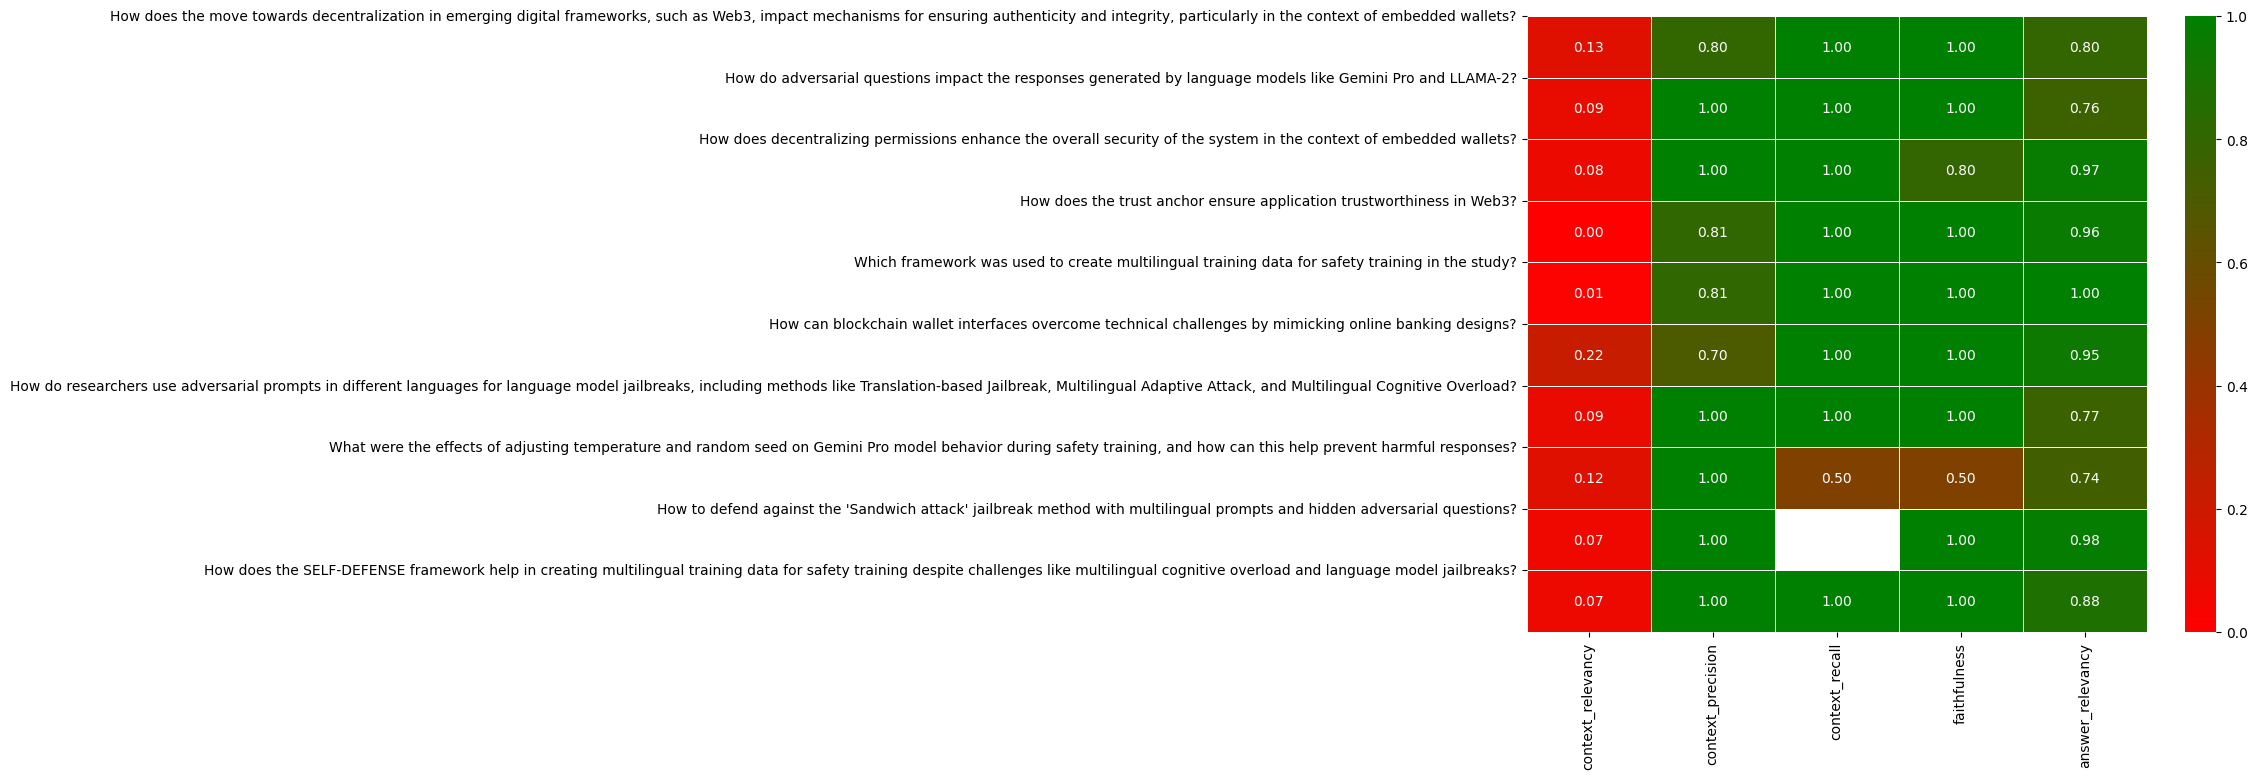

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# only use if not reading saved csv

# df = result.to_pandas()

heatmap_data = df[['context_relevancy', 'context_precision', 'context_recall', 'faithfulness', 'answer_relevancy']]

cmap = LinearSegmentedColormap.from_list('green_red', ['red', 'green'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", linewidths=.5, cmap=cmap)

plt.yticks(ticks=range(len(df['question'])), labels=df['question'], rotation=0)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()
